In [1]:
# libraries
import os
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#crate paths for csv files
CURR_DIR = os.getcwd()
print(CURR_DIR)
orders_path = os.path.join(CURR_DIR, 'Zlecenia.csv')
hours_path = os.path.join(CURR_DIR, 'Godziny.csv')

/Users/w.szczawinski/Projects/DS_final_project


## Import data

In [3]:
orders_df = pd.read_csv(orders_path, sep=';')
hours_df = pd.read_csv(hours_path, sep=';')

## First look on data

In [4]:
orders_df.head(10)

,No,Description,Weight_for_1,Quantity,Typ,Finnish_week,Active,work_preparation_Plan,work_preparation_done,Pre_fabrication_plan
0,1,2320,3360,1,B,201618,0,201552,42324,201602
1,2,2320,3360,1,B,201621,0,201604,42324,201606
2,3,3230,6400,1,B,201615,0,201605,42345,201607
3,4,2830,6230,2,C,201626,0,201603,42164,201604
4,5,2625,5000,2,C,201617,0,201605,42325,201607
5,6,2425,4260,2,C,201619,0,201603,42325,201605
6,7,2825,5380,2,B,201615,0,201603,42327,201605
7,8,3535,8540,2,B,201612,0,201602,42327,201604
8,9,1566,1120,2,B,201621,0,201551,42328,201553
9,10,3636,9050,1,B,201644,0,201620,42331,201622


In [5]:
hours_df.head(10)

,No,Wszystkie.technol,Wszystkie.wykonane,Montaz.technol,Montaz.wykonane,Spawanie.technol,Spawanie.wykonane,Szlifowanie.technol,Szlifowanie.wykonane,Pozostale.technol,Pozostale.wykonane
0,1,223.0,260.0,80.0,78.0,88.0,95.0,32,40.0,23.0,47.0
1,2,223.0,233.0,80.0,82.0,88.0,84.0,32,38.0,23.0,29.0
2,3,379.0,416.5,120.0,118.0,192.0,199.5,48,56.0,19.0,43.0
3,4,802.0,905.5,280.0,300.0,318.0,290.0,80,147.0,124.0,168.5
4,5,635.6,674.0,246.0,226.0,234.0,232.5,64,92.0,91.6,123.5
5,6,635.0,684.5,224.0,213.0,268.0,255.0,64,82.0,79.0,134.5
6,7,474.0,506.5,160.0,159.0,236.0,218.5,44,60.0,34.0,69.0
7,8,724.0,822.5,314.0,328.0,276.0,281.5,80,108.0,54.0,105.0
8,9,316.0,364.5,128.0,114.5,120.0,153.0,32,40.0,36.0,57.0
9,10,508.4,530.5,167.0,175.0,251.0,234.5,62,65.0,28.4,56.0


In [6]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   No                     1272 non-null   int64 
 1   Description            1272 non-null   int64 
 2   Weight_for_1           1272 non-null   int64 
 3   Quantity               1272 non-null   int64 
 4   Typ                    1272 non-null   object
 5   Finnish_week           1272 non-null   int64 
 6   Active                 1272 non-null   object
 7   work_preparation_Plan  1272 non-null   int64 
 8   work_preparation_done  1272 non-null   int64 
 9   Pre_fabrication_plan   1272 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 99.5+ KB


In [7]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No                    1259 non-null   int64  
 1   Wszystkie.technol     1259 non-null   float64
 2   Wszystkie.wykonane    1259 non-null   float64
 3   Montaz.technol        1259 non-null   float64
 4   Montaz.wykonane       1259 non-null   float64
 5   Spawanie.technol      1259 non-null   float64
 6   Spawanie.wykonane     1259 non-null   float64
 7   Szlifowanie.technol   1259 non-null   int64  
 8   Szlifowanie.wykonane  1259 non-null   float64
 9   Pozostale.technol     1259 non-null   float64
 10  Pozostale.wykonane    1259 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 108.3 KB


## Data cleaning

In [8]:
# change values from 'Active' column to only 0 and 1
active = {'Active':1}
orders_df = orders_df.replace(active)

In [9]:
# change 'Typ' values to numeric
typ = {'A': 1, 'B': 2, 'C': 3}
orders_df = orders_df.replace(typ)

In [10]:
orders_df.head(10)

,No,Description,Weight_for_1,Quantity,Typ,Finnish_week,Active,work_preparation_Plan,work_preparation_done,Pre_fabrication_plan
0,1,2320,3360,1,2,201618,0,201552,42324,201602
1,2,2320,3360,1,2,201621,0,201604,42324,201606
2,3,3230,6400,1,2,201615,0,201605,42345,201607
3,4,2830,6230,2,3,201626,0,201603,42164,201604
4,5,2625,5000,2,3,201617,0,201605,42325,201607
5,6,2425,4260,2,3,201619,0,201603,42325,201605
6,7,2825,5380,2,2,201615,0,201603,42327,201605
7,8,3535,8540,2,2,201612,0,201602,42327,201604
8,9,1566,1120,2,2,201621,0,201551,42328,201553
9,10,3636,9050,1,2,201644,0,201620,42331,201622


In [11]:
# convert columns from object to int

orders_df = orders_df.astype(int)

In [12]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   No                     1272 non-null   int64
 1   Description            1272 non-null   int64
 2   Weight_for_1           1272 non-null   int64
 3   Quantity               1272 non-null   int64
 4   Typ                    1272 non-null   int64
 5   Finnish_week           1272 non-null   int64
 6   Active                 1272 non-null   int64
 7   work_preparation_Plan  1272 non-null   int64
 8   work_preparation_done  1272 non-null   int64
 9   Pre_fabrication_plan   1272 non-null   int64
dtypes: int64(10)
memory usage: 99.5 KB


## Marging data into one df

In [13]:
orders_complete_df = pd.merge(orders_df, hours_df, left_on='No', right_on='No', how='left')


## Closer look at the data

In [14]:
orders_complete_df.describe()

,No,Description,Weight_for_1,Quantity,Typ,Finnish_week,Active,work_preparation_Plan,work_preparation_done,Pre_fabrication_plan,Wszystkie.technol,Wszystkie.wykonane,Montaz.technol,Montaz.wykonane,Spawanie.technol,Spawanie.wykonane,Szlifowanie.technol,Szlifowanie.wykonane,Pozostale.technol,Pozostale.wykonane
count,1272.00000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,636.50000,2096.161950,3243.942610,1.837264,2.198899,201849.805031,0.049528,201195.823899,42548.868711,166934.745283,385.147276,458.977760,130.782526,143.450755,142.739039,157.580620,49.844321,65.574265,61.781390,92.372121
std,367.33908,781.164337,2571.745366,0.764739,0.684019,153.121103,0.217054,11305.698051,5539.738619,76369.820779,261.657629,309.295166,91.653476,105.244393,110.087865,115.774765,35.442260,44.201944,44.115794,62.867299
min,1.00000,556.000000,230.000000,1.000000,1.000000,201604.000000,0.000000,0.000000,0.000000,0.000000,37.400000,6.000000,13.000000,0.000000,12.250000,0.000000,4.000000,0.000000,3.400000,2.500000
25%,318.75000,1462.000000,1090.000000,1.000000,2.000000,201723.750000,0.000000,201715.000000,42806.250000,201624.750000,209.000000,238.750000,70.000000,71.500000,73.000000,82.000000,26.000000,34.000000,31.100000,48.750000
50%,636.50000,2016.000000,2420.000000,2.000000,2.000000,201833.500000,0.000000,201822.000000,43214.500000,201807.000000,338.600000,401.000000,114.000000,120.000000,114.000000,132.000000,40.000000,56.000000,50.100000,78.000000
75%,954.25000,2625.000000,4800.000000,2.000000,3.000000,202002.250000,0.000000,201944.000000,43714.000000,201945.000000,499.200000,592.750000,163.000000,186.500000,182.000000,206.750000,64.000000,85.250000,86.000000,119.500000
max,1272.00000,5050.000000,16000.000000,7.000000,3.000000,202550.000000,1.000000,202324.000000,44232.000000,202326.000000,2717.000000,3061.500000,885.000000,992.000000,1176.000000,1120.500000,448.000000,543.500000,587.000000,633.000000


In [15]:
orders_complete_df.corr()

,No,Description,Weight_for_1,Quantity,Typ,Finnish_week,Active,work_preparation_Plan,work_preparation_done,Pre_fabrication_plan,Wszystkie.technol,Wszystkie.wykonane,Montaz.technol,Montaz.wykonane,Spawanie.technol,Spawanie.wykonane,Szlifowanie.technol,Szlifowanie.wykonane,Pozostale.technol,Pozostale.wykonane
No,1.000000,-0.073788,-0.085007,-0.049984,-0.093889,0.953548,0.339990,0.097885,-0.127030,0.142971,-0.062036,-0.066805,-0.130891,-0.037218,-0.116855,-0.095946,0.108764,0.023664,0.108211,-0.106306
Description,-0.073788,1.000000,0.969566,-0.204007,0.288679,-0.024815,0.051678,0.023232,-0.089720,0.050227,0.666714,0.658460,0.638305,0.648231,0.710439,0.686276,0.656324,0.583983,0.328131,0.479888
Weight_for_1,-0.085007,0.969566,1.000000,-0.162266,0.253889,-0.037576,0.045965,0.041953,-0.077296,0.030866,0.699514,0.686808,0.670492,0.678615,0.751196,0.716847,0.677452,0.615862,0.337121,0.489775
Quantity,-0.049984,-0.204007,-0.162266,1.000000,-0.086978,-0.066837,-0.031984,0.060402,0.064060,-0.111014,0.305790,0.293807,0.317173,0.265175,0.211066,0.216163,0.274787,0.339456,0.407278,0.364798
Typ,-0.093889,0.288679,0.253889,-0.086978,1.000000,-0.053693,0.028984,0.015463,0.003545,0.075107,0.265268,0.245275,0.275803,0.196885,0.179867,0.207313,0.160817,0.162591,0.422301,0.381009
Finnish_week,0.953548,-0.024815,-0.037576,-0.066837,-0.053693,1.000000,0.409194,0.097010,-0.187155,0.164062,-0.030408,-0.039383,-0.095118,-0.008953,-0.084483,-0.065181,0.127480,0.031475,0.125667,-0.080864
Active,0.339990,0.051678,0.045965,-0.031984,0.028984,0.409194,1.000000,0.018052,-0.542682,0.105125,0.053583,-0.039201,0.027652,-0.038663,0.030383,-0.045443,0.106283,-0.042318,0.099152,-0.014699
work_preparation_Plan,0.097885,0.023232,0.041953,0.060402,0.015463,0.097010,0.018052,1.000000,-0.001806,-0.023086,0.055733,0.049450,0.049893,0.046213,0.048276,0.047797,0.055490,0.046484,0.061854,0.045216
work_preparation_done,-0.127030,-0.089720,-0.077296,0.064060,0.003545,-0.187155,-0.542682,-0.001806,1.000000,-0.044741,-0.032386,0.080410,-0.025576,0.076275,-0.045438,0.075109,-0.025995,0.113167,-0.004676,0.050028
Pre_fabrication_plan,0.142971,0.050227,0.030866,-0.111014,0.075107,0.164062,0.105125,-0.023086,-0.044741,1.000000,0.042769,0.029237,0.025445,0.039067,0.017097,0.021395,0.080237,0.019370,0.093678,0.025418


array([[<AxesSubplot:title={'center':'No'}>,
        <AxesSubplot:title={'center':'Description'}>,
        <AxesSubplot:title={'center':'Weight_for_1'}>],
       [<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Typ'}>,
        <AxesSubplot:title={'center':'Finnish_week'}>],
       [<AxesSubplot:title={'center':'Active'}>,
        <AxesSubplot:title={'center':'work_preparation_Plan'}>,
        <AxesSubplot:title={'center':'work_preparation_done'}>],
       [<AxesSubplot:title={'center':'Pre_fabrication_plan'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

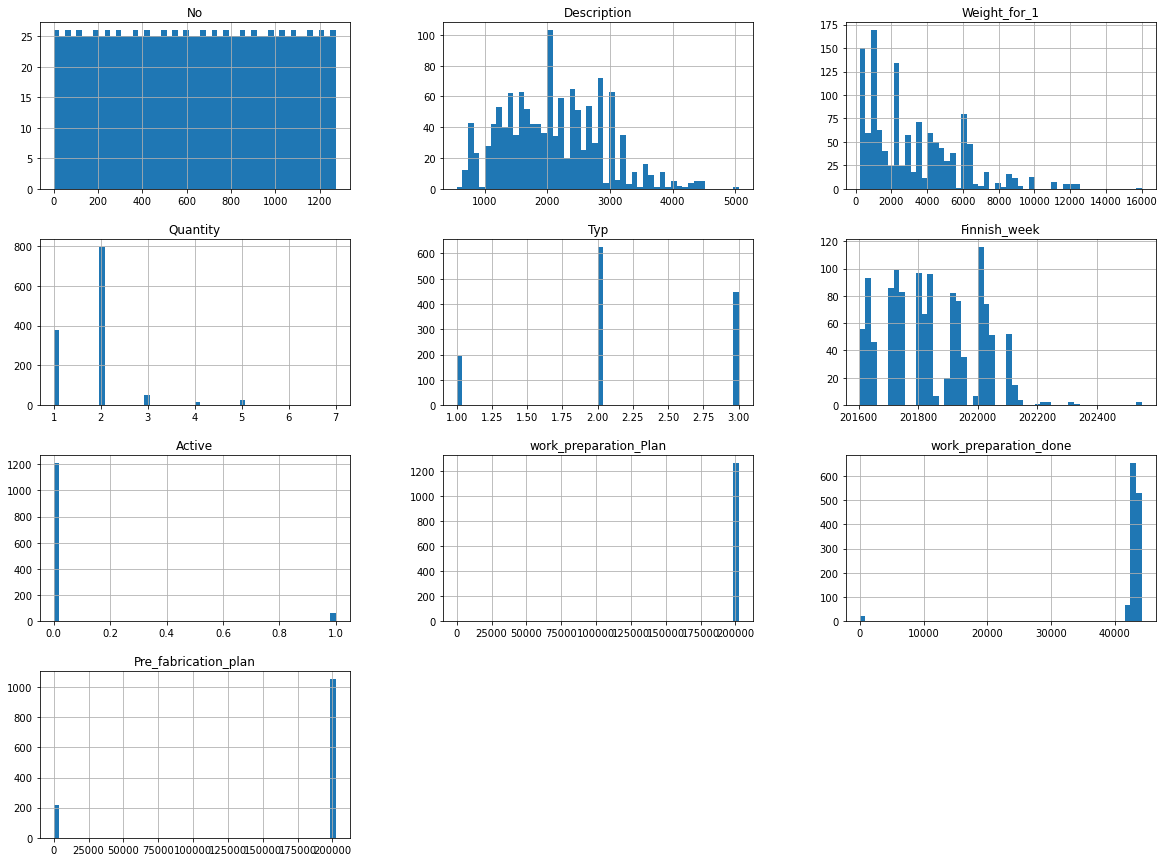

In [16]:
orders_df.hist(bins=50, figsize=(20,15))

<AxesSubplot:>

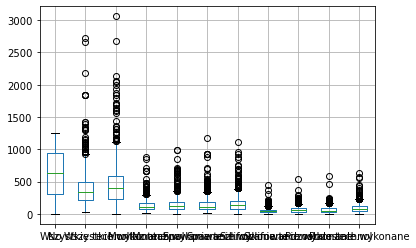

In [17]:
hours_df.boxplot()

<AxesSubplot:>

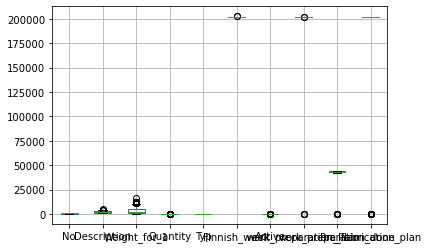

In [18]:
orders_df.boxplot()

## Prepering for ML

In [19]:
# to enable identical output from this notebook
np.random.seed(42)

In [20]:
# dropping entries which contains NAs
orders_complete_df = orders_complete_df.dropna()

In [36]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(orders_complete_df, test_size=0.2, random_state=4)

In [37]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 326 to 1095
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   No                     252 non-null    int64  
 1   Description            252 non-null    int64  
 2   Weight_for_1           252 non-null    int64  
 3   Quantity               252 non-null    int64  
 4   Typ                    252 non-null    int64  
 5   Finnish_week           252 non-null    int64  
 6   Active                 252 non-null    int64  
 7   work_preparation_Plan  252 non-null    int64  
 8   work_preparation_done  252 non-null    int64  
 9   Pre_fabrication_plan   252 non-null    int64  
 10  Wszystkie.technol      252 non-null    float64
 11  Wszystkie.wykonane     252 non-null    float64
 12  Montaz.technol         252 non-null    float64
 13  Montaz.wykonane        252 non-null    float64
 14  Spawanie.technol       252 non-null    float64
 15  Spa

In [38]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007 entries, 370 to 1146
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   No                     1007 non-null   int64  
 1   Description            1007 non-null   int64  
 2   Weight_for_1           1007 non-null   int64  
 3   Quantity               1007 non-null   int64  
 4   Typ                    1007 non-null   int64  
 5   Finnish_week           1007 non-null   int64  
 6   Active                 1007 non-null   int64  
 7   work_preparation_Plan  1007 non-null   int64  
 8   work_preparation_done  1007 non-null   int64  
 9   Pre_fabrication_plan   1007 non-null   int64  
 10  Wszystkie.technol      1007 non-null   float64
 11  Wszystkie.wykonane     1007 non-null   float64
 12  Montaz.technol         1007 non-null   float64
 13  Montaz.wykonane        1007 non-null   float64
 14  Spawanie.technol       1007 non-null   float64
 15  Sp

array([[<AxesSubplot:xlabel='Weight_for_1', ylabel='Weight_for_1'>,
        <AxesSubplot:xlabel='Quantity', ylabel='Weight_for_1'>,
        <AxesSubplot:xlabel='Typ', ylabel='Weight_for_1'>,
        <AxesSubplot:xlabel='Wszystkie.technol', ylabel='Weight_for_1'>,
        <AxesSubplot:xlabel='Wszystkie.wykonane', ylabel='Weight_for_1'>],
       [<AxesSubplot:xlabel='Weight_for_1', ylabel='Quantity'>,
        <AxesSubplot:xlabel='Quantity', ylabel='Quantity'>,
        <AxesSubplot:xlabel='Typ', ylabel='Quantity'>,
        <AxesSubplot:xlabel='Wszystkie.technol', ylabel='Quantity'>,
        <AxesSubplot:xlabel='Wszystkie.wykonane', ylabel='Quantity'>],
       [<AxesSubplot:xlabel='Weight_for_1', ylabel='Typ'>,
        <AxesSubplot:xlabel='Quantity', ylabel='Typ'>,
        <AxesSubplot:xlabel='Typ', ylabel='Typ'>,
        <AxesSubplot:xlabel='Wszystkie.technol', ylabel='Typ'>,
        <AxesSubplot:xlabel='Wszystkie.wykonane', ylabel='Typ'>],
       [<AxesSubplot:xlabel='Weight_for_1', ylab

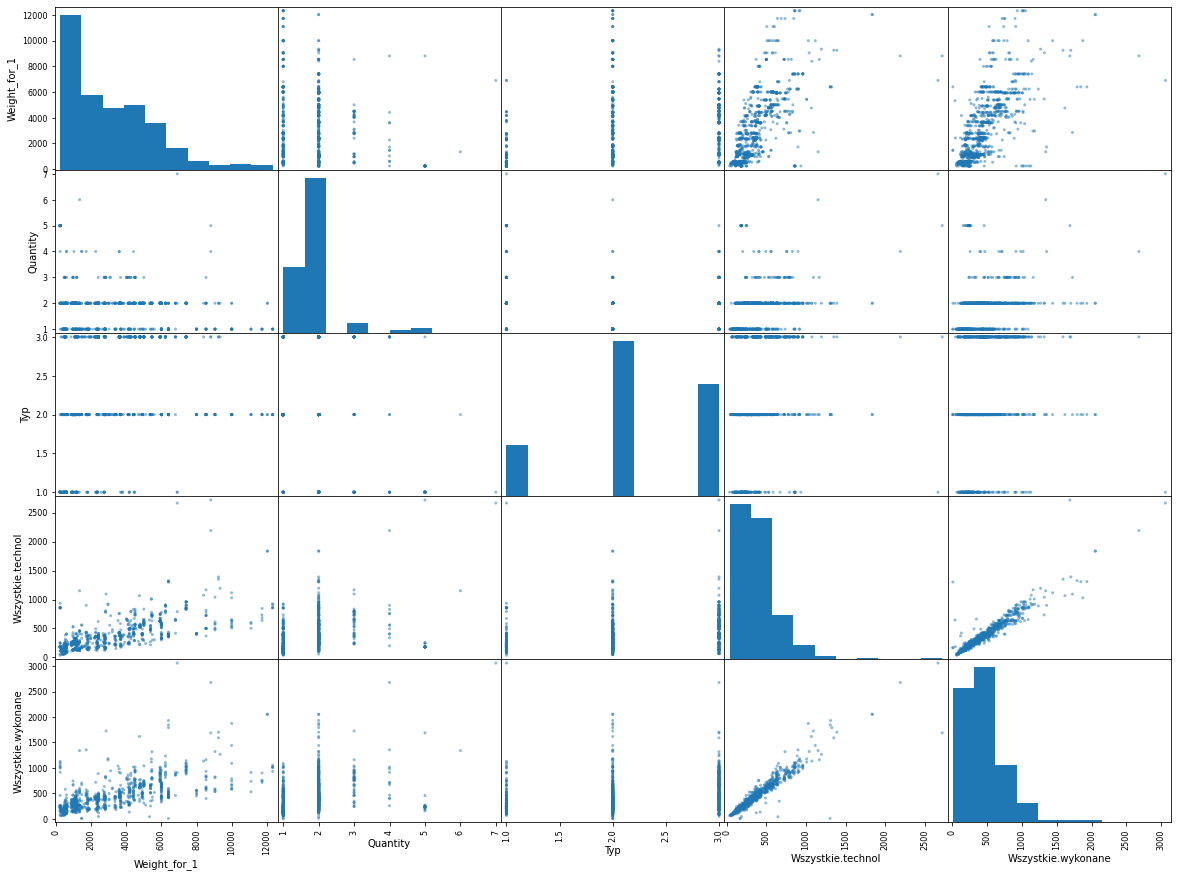

In [39]:
from pandas.plotting import scatter_matrix

attributes = ['Weight_for_1', 'Quantity', 'Typ', 'Wszystkie.technol', 'Wszystkie.wykonane']

scatter_matrix(train_set[attributes], figsize=(20, 15))

## Creating dfs without some columns and spliting between features and labels

In [76]:
orders_train_set = train_set[['Weight_for_1', 'Quantity', 'Typ']].copy()
orders_train_set_labels = train_set[['Wszystkie.wykonane']].copy()

orders_test_set = test_set[['Weight_for_1', 'Quantity', 'Typ']].copy()
orders_test_set_labels = test_set[['Wszystkie.wykonane']].copy()


<AxesSubplot:xlabel='Wszystkie.technol', ylabel='Wszystkie.wykonane'>

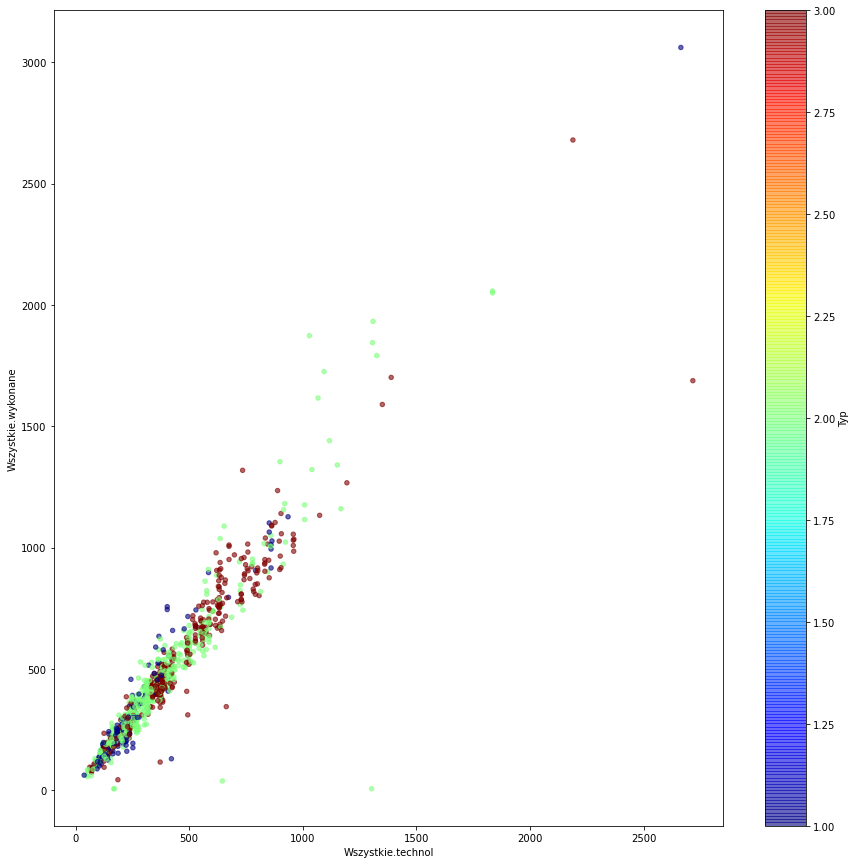

In [77]:
train_set.plot(kind="scatter", x='Wszystkie.technol', y='Wszystkie.wykonane', alpha=0.6,
    figsize=(15,15), c="Typ", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

## Plot above shows that most of predicted working hours was too optimistic and almost always there was some more time needed. This trend is true across all 3 design types. Additionally it can be noticed that type 3 (C) is the most time consuming.

## Feature scaling

In [78]:
#from sklearn import preprocessing
# min-max scaler - range (0,1)
#min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 

#orders_train_set_scaled = min_max_scaler.fit_transform(orders_train_set)

## Training the model

### Trying simple Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(orders_train_set, orders_train_set_labels)

LinearRegression()

In [80]:
some_data = orders_train_set.iloc[:5]
some_labels = orders_train_set_labels.iloc[:5]


In [81]:
print('Predictions: \t', lin_reg.predict(some_data))

Predictions: 	 [[ 267.82179995]
 [1041.69947244]
 [ 809.44951026]
 [ 718.45605493]
 [ 290.63017825]]


In [82]:
print('Labels: \t', list(some_labels['Wszystkie.wykonane']))

Labels: 	 [216.0, 756.5, 569.0, 446.5, 290.0]


### Mesure linear regression model RMSE on the whole training set

In [83]:
from sklearn.metrics import mean_squared_error
orders_predictions = lin_reg.predict(orders_train_set)

lin_mse = mean_squared_error(orders_train_set_labels, orders_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

190.2866420338002

### Trying DecisionTreeRegressor

In [84]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(orders_train_set, orders_train_set_labels)

orders_predictions = tree_reg.predict(orders_train_set)
tree_mse = mean_squared_error(orders_train_set_labels, orders_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

78.37949026863325

In [85]:
print('Predictions: \t', tree_reg.predict(some_data))

Predictions: 	 [207.1        789.83333333 642.41666667 517.         315.35714286]


In [86]:
print('Labels: \t', list(some_labels['Wszystkie.wykonane']))

Labels: 	 [216.0, 756.5, 569.0, 446.5, 290.0]


### Evaluation using cross validation

In [87]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, orders_train_set, orders_train_set_labels,
                        scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

In [88]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(rmse_scores)

Scores: [121.50480979  96.79807986 139.55822427 286.06887385 156.12627932
  96.27438394  90.48626513 148.21625229 302.4204894  104.94724219]
Mean: 154.24009000346345
Standard deviation: 73.36020838310482


In [89]:
#computing scores for linear regression
lin_scores = cross_val_score(lin_reg, orders_train_set, orders_train_set_labels,
                            scoring='neg_mean_squared_error', cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [240.65150507 158.12641763 139.1945279  161.7047974  243.19822991
 167.62027263 143.12781918 189.84613236 264.15052754 165.01481842]
Mean: 187.26350480297035
Standard deviation: 43.056845623491704


## Evaluation on the test set

In [90]:
orders_test_set_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 326 to 1095
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wszystkie.wykonane  252 non-null    float64
dtypes: float64(1)
memory usage: 12.0 KB


In [91]:
scores = cross_val_score(tree_reg, orders_test_set, orders_test_set_labels,
                        scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

display_scores(rmse_scores)

Scores: [ 89.87476427 122.82603788 114.86421609 226.46577188  66.01822756
 227.1992474   94.17964918 391.86862346 124.1838334   93.17905726]
Mean: 155.06594283893475
Standard deviation: 94.71138605065896
